<a href="https://colab.research.google.com/github/23032212/AI-project-/blob/main/GenAI_CourseProject_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers torchvision torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink-

In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
from transformers import BeitFeatureExtractor, BeitModel

# Load the BEiT feature extractor and model
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224')
model = BeitModel.from_pretrained('microsoft/beit-base-patch16-224')

# Set model to evaluation mode
model.eval()

# Directory path
image_dir = "/content/drive/MyDrive/Autistic Children Emotions - Dr. Fatma M. Talaat/Train"

# Image preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

# Function to extract features
def extract_features(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
    with torch.no_grad():
        outputs = model(pixel_values)
    last_hidden_state = outputs.last_hidden_state  # Shape: [1, 197, 768]
    cls_embedding = last_hidden_state[:, 0]         # [CLS] token embedding
    return cls_embedding.squeeze().numpy()

# Example: Extract features from all images in folder
features = {}
for root, _, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(root, file)
            try:
                features[file] = extract_features(path)
                print(f"Extracted features for {file}")
            except Exception as e:
                print(f"Error processing {file}: {e}")

# Optional: Save features to disk
import pickle
with open("autistic_children_beit_features.pkl", "wb") as f:
    pickle.dump(features, f)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `BeitFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]

Extracted features for 0943.jpg
Extracted features for 0644.jpg
Extracted features for 0006.jpg
Extracted features for 0690.jpg
Extracted features for 0600.jpg
Extracted features for 1313.jpg
Extracted features for 0071.jpg
Extracted features for 1291.jpg
Extracted features for 0028.jpg
Extracted features for 0029.jpg
Extracted features for 0402.jpg
Extracted features for 0046.jpg
Extracted features for 1262.jpg
Extracted features for 0805.jpg
Extracted features for 0641.jpg
Extracted features for 0628.jpg
Extracted features for 0052.jpg
Extracted features for 1261.jpg
Extracted features for 1254.jpg
Extracted features for 0114.jpg
Extracted features for 0087.jpg
Extracted features for 1258.jpg
Extracted features for 0363.jpg
Extracted features for 0004.jpg
Extracted features for 1256.jpg
Extracted features for 0638.jpg
Extracted features for 0615.jpg
Extracted features for 0950.jpg
Extracted features for 0042.jpg
Extracted features for 0161.jpg
Extracted features for 0260.jpg
Extracte

CNN

Classes: ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']
Class distribution: Counter({3: 350, 4: 200, 1: 67, 5: 63, 0: 48, 2: 30})
Epoch 1/10 | Loss: 1.3371 | Accuracy: 51.19%
Epoch 2/10 | Loss: 0.6462 | Accuracy: 81.53%
Epoch 3/10 | Loss: 0.4648 | Accuracy: 85.75%
Epoch 4/10 | Loss: 0.4098 | Accuracy: 85.62%
Epoch 5/10 | Loss: 0.3979 | Accuracy: 83.91%
Epoch 6/10 | Loss: 0.3852 | Accuracy: 85.36%
Epoch 7/10 | Loss: 0.3574 | Accuracy: 87.34%
Epoch 8/10 | Loss: 0.3172 | Accuracy: 87.73%
Epoch 9/10 | Loss: 0.3374 | Accuracy: 87.60%
Epoch 10/10 | Loss: 0.3207 | Accuracy: 88.13%

Classification Report:
              precision    recall  f1-score   support

     Natural       1.00      1.00      1.00       125
       anger       0.73      0.99      0.84       122
        fear       0.86      0.94      0.90       124
         joy       1.00      1.00      1.00       134
     sadness       0.94      0.50      0.66       133
    surprise       0.86      0.91      0.88       120

   

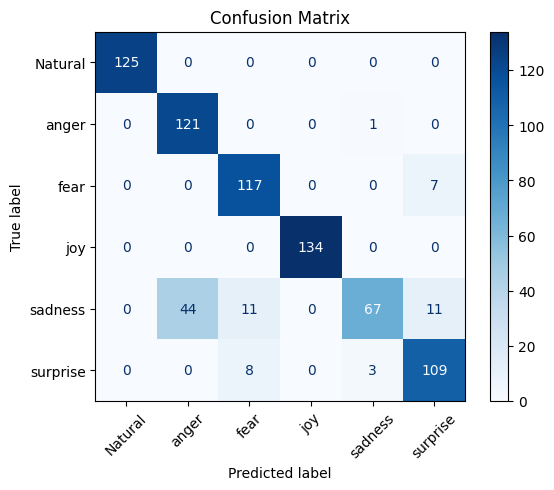

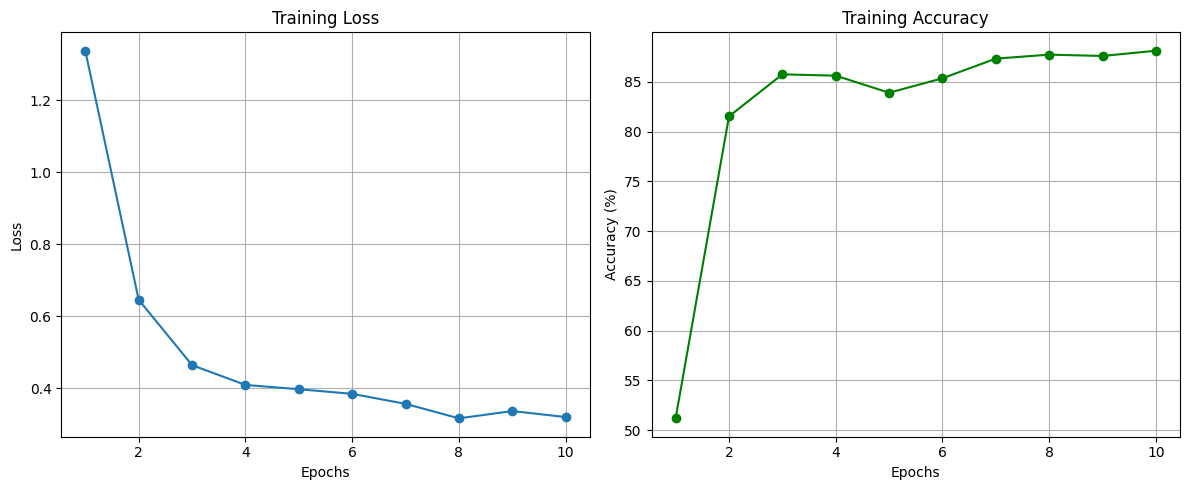

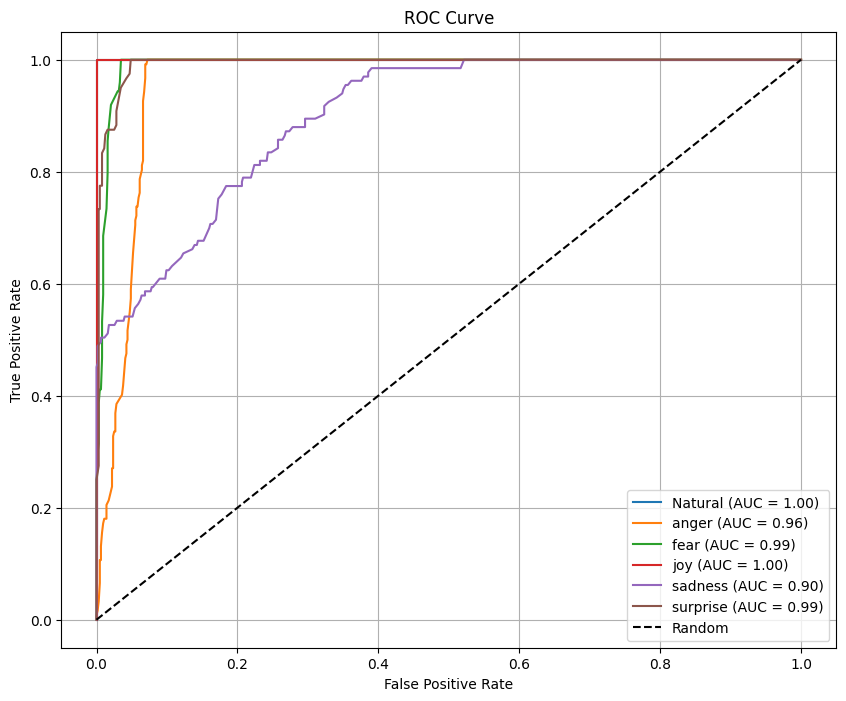

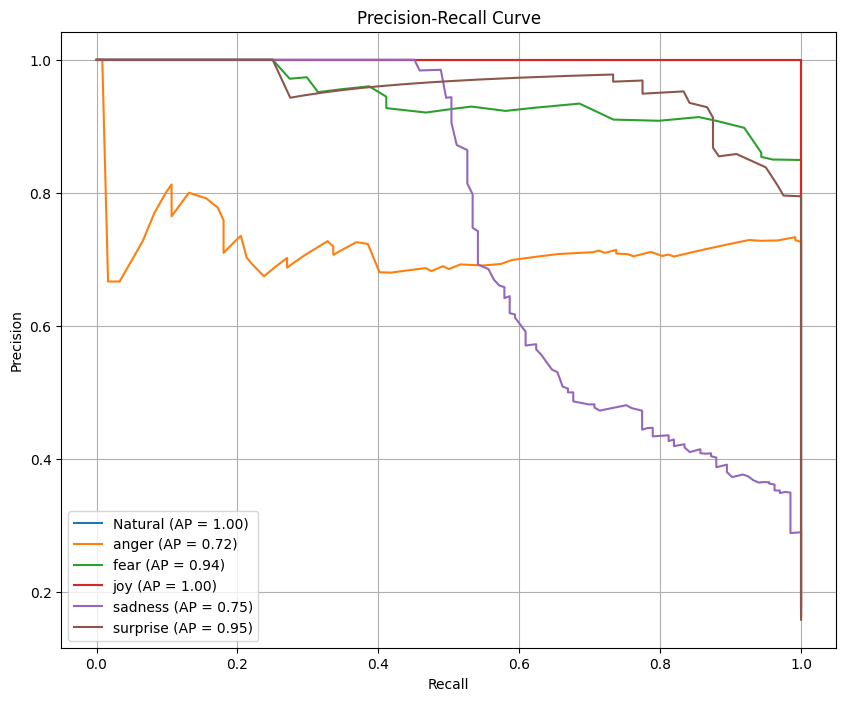

In [ ]:
# 📌 Import libraries
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import numpy as np
import collections

# 📌 Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Dataset path
data_dir = "/content/drive/MyDrive/Autistic Children Emotions - Dr. Fatma M. Talaat/Train"

# 📌 Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 📌 Load dataset
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = train_dataset.classes
print("Classes:", class_names)

# 📌 Balance dataset using WeightedRandomSampler
labels = [label for _, label in train_dataset.samples]
class_counts = collections.Counter(labels)
print("Class distribution:", class_counts)

class_weights = 1. / torch.tensor([class_counts[i] for i in range(len(class_names))], dtype=torch.float)
sample_weights = [class_weights[label] for label in labels]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)

# 📌 Load pretrained CNN (ResNet18) and modify classification head
model = models.resnet18(pretrained=True)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, len(class_names))
model = model.to(device)

# 📌 Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 📌 Training loop
epochs = 10
train_loss_history = []
train_acc_history = []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}%")

# 📌 Evaluation
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(probs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())
        all_probs.extend(probs.cpu().numpy())

# 📌 Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# 📌 Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 📌 Training Loss & Accuracy Plot
epochs_range = range(1, epochs + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_history, marker='o', label='Training Loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc_history, marker='o', color='green', label='Training Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 ROC and Precision-Recall Curves
y_true_bin = label_binarize(all_labels, classes=range(len(class_names)))
y_score = np.array(all_probs)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_score[:, i])

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(recall[i], precision[i], label=f"{class_names[i]} (AP = {average_precision[i]:.2f})")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


✅ Model weights loaded successfully.


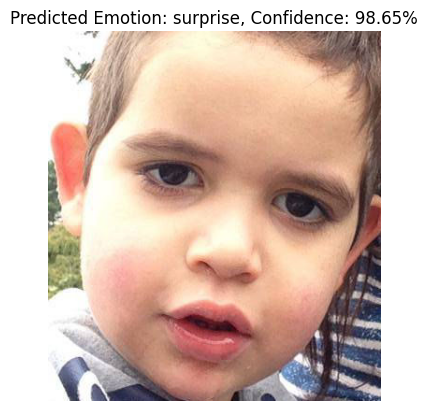

Predicted Emotion: surprise
Confidence: 98.65%


In [ ]:
# 📌 Imports
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# 📌 Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Updated class names
class_names = ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']

# 📌 Image transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 📌 Load model architecture
model = models.resnet18(pretrained=False)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, len(class_names))
model = model.to(device)

# 📌 Load model weights
weights_path = "/content/drive/MyDrive/Autistic Children Emotions - Dr. Fatma M. Talaat/model_weights.pth"
if os.path.exists(weights_path):
    model.load_state_dict(torch.load(weights_path, map_location=device))
    print("✅ Model weights loaded successfully.")
else:
    print("❌ Model weights file not found at:", weights_path)

model.eval()

# 📌 Load and preprocess the image
image_path = "/content/drive/MyDrive/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/surprise/0115.jpg"
image = Image.open(image_path).convert("RGB")  # Ensure it's in RGB
image_tensor = transform(image).unsqueeze(0).to(device)  # Apply transforms and add batch dim

# 📌 Predict
with torch.no_grad():
    outputs = model(image_tensor)
    probs = torch.softmax(outputs, dim=1)
    _, predicted = torch.max(probs, 1)
    predicted_emotion = class_names[predicted.item()]
    confidence = probs[0][predicted.item()].item()

# 📌 Show result
plt.imshow(Image.open(image_path))
plt.title(f"Predicted Emotion: {predicted_emotion}, Confidence: {confidence:.2%}")
plt.axis('off')
plt.show()

# 📌 Print to console
print(f"Predicted Emotion: {predicted_emotion}")
print(f"Confidence: {confidence:.2%}")
